In [1]:
import os
import pandas as pd
import numpy as np

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC

In [2]:
#initial data set

train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
valid = pd.read_csv('./valid.csv')

In [4]:
train.head(10) #1 is legit and #0 is spam

,text,label
0,i m in solihull | do you want anything,1
1,gud mrng dear hav a nice day,1
2,dude how do you like the buff wind,1
3,yup wun believe wat u really neva c e msg i ...,1
4,did you get any gift this year i didnt get an...,1
5,hello from orange for 1 month s free access t...,0
6,ü still attending da talks,1
7,thk some of em find wtc too far weiyi not g...,1
8,oh is it send me the address,1
9,my sister in law hope you are having a great ...,1


Exploratory Data Analysis

In [5]:
#Percentage of legit Messages
train['label'].mean()*100 

86.48648648648648

In [23]:
#creating two seperate dfs: 1 for legit and 1 for Spam
df_legit = train.loc[ train['label']==1]
df_spam = train.loc[ train['label']==0]
    
df_legit['len'] = [len(x) for x in df_legit["text"]]
spamavg = df_legit.len.mean()

print(df_legit.head(5))

df_spam['len'] = [len(x) for x in df_spam["text"]]
nonspamavg = df_spam.len.mean()
print(df_spam.head(5))

                                                text  label  length  len
0           i m in solihull  | do you want anything       1       0   40
1                       gud mrng dear hav a nice day      1       0   28
2                dude how do you like the buff wind       1       0   35
3  yup  wun believe wat  u really neva c e msg i ...      1       0   58
4  did you get any gift  this year i didnt get an...      1       0   60
                                                 text  label  length  len
5   hello from orange  for 1 month s free access t...      0       5  156
44  you ve won tkts to the euro2004 cup final or £...      0      32  110
46  important information 4 orange user 0789xxxxxx...      0       6  163
48  hey boys  want hot xxx pics sent direct 2 ur p...      0      12  140
70   123 congratulations   in this week s competit...      0      41  169


C:\Users\Rachel\AppData\Local\Temp\ipykernel_6648\172300792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_legit['len'] = [len(x) for x in df_legit["text"]]
C:\Users\Rachel\AppData\Local\Temp\ipykernel_6648\172300792.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spam['len'] = [len(x) for x in df_spam["text"]]


In [7]:
spamavg

71.397216796875

In [8]:
nonspamavg

138.546875

In [9]:
train['length'] = train['text'].apply(lambda x: len(''.join([a for a in x if a.isdigit()])))

print(np.mean(train['length'][train['label'] == 1]), np.mean(train['length'][train['label'] == 0]))

print(train.head(10))

0.308349609375 15.846875
                                                text  label  length
0           i m in solihull  | do you want anything       1       0
1                       gud mrng dear hav a nice day      1       0
2                dude how do you like the buff wind       1       0
3  yup  wun believe wat  u really neva c e msg i ...      1       0
4  did you get any gift  this year i didnt get an...      1       0
5  hello from orange  for 1 month s free access t...      0       5
6                        ü still attending da talks       1       0
7  thk some of em find wtc too far    weiyi not g...      1       1
8                      oh is it  send me the address      1       0
9  my sister in law  hope you are having a great ...      1       0


In [10]:
test['length'] = test['text'].apply(lambda x: len(''.join([a for a in x if a.isdigit()])))

print(np.mean(test['length'][test['label'] == 1]), np.mean(test['length'][test['label'] == 0]))

print(test.head(10))

0.2 5.5
                                                text  label  length
0                 why did i wake up on my own  gt         1       0
1      win a £1000 cash prize or a prize worth £5000      0       8
2                                        ok thanx         1       0
3  burger king   wanna play footy at a top stadiu...      0       2
4  no problem  we will be spending a lot of quali...      1       0
5                         happy new year my no 1 man      1       1
6  for your chance to win a free bluetooth headse...      0       0
7  bloomberg  message center  447797706009 why wa...      0      12
8  jus finish blowing my hair  u finish dinner al...      1       0


In [11]:
valid['length'] = valid['text'].apply(lambda x: len(''.join([a for a in x if a.isdigit()])))

print(np.mean(valid['length'][valid['label'] == 1]), np.mean(valid['length'][valid['label'] == 0]))

print(valid.head(10))

0.24903474903474904 14.73134328358209
                                                text  label  length
0  hello darling how are you today  i would love ...      0       0
1                 why did i wake up on my own  gt         1       0
2                        super msg da  nalla timing       1       0
3             i want to be inside you every night         1       0
4                         happy new year my no 1 man      1       1
5  for your chance to win a free bluetooth headse...      0       0
6                             lil fever   now fine        1       0
7                                        ok thanx         1       0
8  jus finish blowing my hair  u finish dinner al...      1       0
9  no problem  we will be spending a lot of quali...      1       0


In [12]:
X_train=train['text']
Y_train=train['label']
 
X_test=test['text']
Y_test=test['label']

X_valid=valid['text']
Y_valid=valid['label']

Data Modelling
MNNB Model (Count Vectorizer)

In [13]:
#fitting and transforming X_train using a Count Vectorizer with default parameters
vect = CountVectorizer().fit(X_train)
X_train_vectorized = vect.transform(X_train)

In [14]:
vect

CountVectorizer()

In [15]:
X_train_vectorized

<4736x7952 sparse matrix of type '<class 'numpy.int64'>'
	with 63048 stored elements in Compressed Sparse Row format>

In [16]:
#fitting a multinomial Naive Bayes Classifier Model with smoothing alpha=0.1
model = sklearn.naive_bayes.MultinomialNB(alpha=0.1)
model_fit = model.fit(X_train_vectorized, Y_train)

In [17]:
#making predictions & looking at AUC score
predictions = model.predict(vect.transform(X_test))
aucscore = roc_auc_score(Y_test, predictions) 
aucscore

1.0

In [18]:
#confusion matrix
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(Y_test, predictions).ravel()
print(pd.DataFrame(confusion_matrix(Y_test, predictions),
             columns=['Predicted Legit', "Predicted Spam"], index=['Actual Legit', 'Actual Spam']))

print(f'\nTrue Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

print(f'\nTrue Positive Rate: { (tp / (tp + fn))}')
print(f'Specificity: { (tn / (tn + fp))}')
print(f'False Positive Rate: { (fp / (fp + tn))}')

              Predicted Legit  Predicted Spam
Actual Legit                4               0
Actual Spam                 0               5

True Positives: 5
False Positives: 0
True Negatives: 4
False Negatives: 0

True Positive Rate: 1.0
Specificity: 1.0
False Positive Rate: 0.0


Data Modelling
MNNB Model (tfid Vectorizer)

In [ ]:
# fitting and transforming X_train using a tfid vectorizer, ignoring terms with a document frequency lower than 3.
vect = TfidfVectorizer(min_df=3).fit(X_train)
X_train_vectorized = vect.transform(X_train)

In [ ]:
# fitting training data to a multinomial NB model
model = sklearn.naive_bayes.MultinomialNB()
model_fit = model.fit(X_train_vectorized, Y_train) 

In [24]:
#looking at model features
feature_names = np.array(vect.get_feature_names())
sorted_tfidf_index = X_train_vectorized.max(0).toarray()[0].argsort()
((pd.Series(feature_names[sorted_tfidf_index[:20]]),
            pd.Series(feature_names[sorted_tfidf_index[-21:-1]])))

C:\Users\Rachel\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(0           00
 1        pairs
 2     painting
 3      painful
 4         pain
 5          pai
 6         page
 7        padhe
 8        packs
 9      packing
 10     package
 11       paces
 12          oz
 13      oyster
 14      oxygen
 15         owo
 16        owns
 17       owned
 18         owl
 19        owed
 dtype: object,
 0       smile
 1          is
 2         are
 3     missing
 4         for
 5          ur
 6          if
 7         can
 8          hi
 9          to
 10         do
 11        the
 12       face
 13        her
 14         be
 15         it
 16       will
 17         my
 18        you
 19         lt
 dtype: object)

In [26]:
#making predictions
predictions = model_fit.predict(vect.transform(X_test))
aucscore = roc_auc_score(Y_test, predictions)
print(aucscore)

1.0


In [27]:
#confusion matrix
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(Y_test, predictions).ravel()
print(pd.DataFrame(confusion_matrix(Y_test, predictions),
             columns=['Predicted Legit', "Predicted Spam"], index=['Actual Legit', 'Actual Spam']))

print(f'\nTrue Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

print(f'\nTrue Positive Rate: { (tp / (tp + fn))}')
print(f'Specificity: { (tn / (tn + fp))}')
print(f'False Positive Rate: { (fp / (fp + tn))}')

              Predicted Legit  Predicted Spam
Actual Legit                4               0
Actual Spam                 0               5

True Positives: 5
False Positives: 0
True Negatives: 4
False Negatives: 0

True Positive Rate: 1.0
Specificity: 1.0
False Positive Rate: 0.0


SVC MODEL

In [28]:
#defining an additional function
def add_feature(X, feature_to_add):
    """
    Returns sparse feature matrix with added feature.
    feature_to_add can also be a list of features.
    """
    from scipy.sparse import csr_matrix, hstack
    return hstack([X, csr_matrix(feature_to_add).T], 'csr')

In [29]:
#fit and transfor X_train and X_test
vectorizer = TfidfVectorizer(min_df=5)

X_train_transformed = vectorizer.fit_transform(X_train)
X_train_transformed_with_length = add_feature(X_train_transformed, X_train.str.len())

X_test_transformed = vectorizer.transform(X_test)
X_test_transformed_with_length = add_feature(X_test_transformed, X_test.str.len())

In [32]:
# SVM creation
clf = SVC(C=10000)

clf.fit(X_train_transformed_with_length, Y_train)

SVC(C=10000)

In [33]:
Y_predicted = clf.predict(X_test_transformed_with_length)

In [34]:
roc_auc_score(Y_test, Y_predicted)

0.75

In [35]:
#confusion matrix
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(Y_test, Y_predicted).ravel()
print(pd.DataFrame(confusion_matrix(Y_test, Y_predicted),
             columns=['Predicted Legit', "Predicted Spam"], index=['Actual Legit', 'Actual Spam']))

print(f'\nTrue Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

print(f'\nTrue Positive Rate: { (tp / (tp + fn))}')
print(f'Specificity: { (tn / (tn + fp))}')
print(f'False Positive Rate: { (fp / (fp + tn))}')

              Predicted Legit  Predicted Spam
Actual Legit                2               2
Actual Spam                 0               5

True Positives: 5
False Positives: 2
True Negatives: 2
False Negatives: 0

True Positive Rate: 1.0
Specificity: 0.5
False Positive Rate: 0.5


Logistic Regression Model with ngrams

In [36]:
from sklearn.linear_model import LogisticRegression

vectorizer = TfidfVectorizer(min_df=5, ngram_range=[1,3])

X_train_transformed = vectorizer.fit_transform(X_train)
X_train_transformed_with_length = add_feature(X_train_transformed, [X_train.str.len(),
                                                                    X_train.apply(lambda x: len(''.join([a for a in x if a.isdigit()])))])

X_test_transformed = vectorizer.transform(X_test)
X_test_transformed_with_length = add_feature(X_test_transformed, [X_test.str.len(),
                                                                  X_test.apply(lambda x: len(''.join([a for a in x if a.isdigit()])))])

clf = LogisticRegression(C=100)

clf.fit(X_train_transformed_with_length, Y_train)

Y_predicted = clf.predict(X_test_transformed_with_length)

roc_auc_score(Y_test, Y_predicted)

C:\Users\Rachel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.875

In [37]:
#confusion matrix
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(Y_test, Y_predicted).ravel()
print(pd.DataFrame(confusion_matrix(Y_test, Y_predicted),
             columns=['Predicted Legit', "Predicted Spam"], index=['Actual Legit', 'Actual Spam']))

print(f'\nTrue Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

print(f'\nTrue Positive Rate: { (tp / (tp + fn))}')
print(f'Specificity: { (tn / (tn + fp))}')
print(f'False Positive Rate: { (fp / (fp + tn))}')

              Predicted Legit  Predicted Spam
Actual Legit                3               1
Actual Spam                 0               5

True Positives: 5
False Positives: 1
True Negatives: 3
False Negatives: 0

True Positive Rate: 1.0
Specificity: 0.75
False Positive Rate: 0.25


Model Comparison

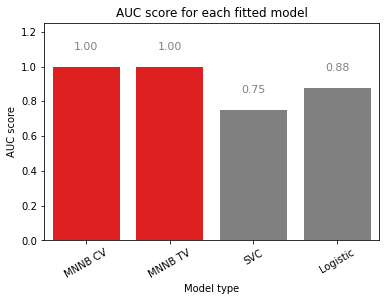

In [38]:
import seaborn as sb
import matplotlib.pyplot as plt

label = ['MNNB CV', 'MNNB TV', 'SVC', 'Logistic']
auclist = [1.0, 1.0, 0.75, 0.875]

#generates an array of length label and use it on the X-axis
def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(label))
    clrs = ['grey' if (x < max(auclist)) else 'red' for x in auclist ]
    g=sb.barplot(x=index, y=auclist, palette=clrs) # color=clrs)   
    plt.xlabel('Model type', fontsize=10)
    plt.ylabel('AUC score', fontsize=10)
    plt.xticks(index, label, fontsize=10, rotation=30)
    plt.title('AUC score for each fitted model')
    ax=g
    for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')
    g.set_ylim(0,1.25) #To make space for the annotations

plot_bar_x()